In [1]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


In [22]:
# prepare the dataset
X_numpy, y_numpy = datasets.make_regression(n_samples= 100, n_features= 1, noise= 20, random_state= 1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # reshape to 1 

n_sample, n_features = X.shape

In [23]:
# setup the model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [24]:
# loss function
Lr = 0.01
l = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), Lr)

In [25]:
# training
num_epochs = 100

for epoch in range (num_epochs):

    optimizer.zero_grad()
    
    # forward pass and loss
    y_predected = model(X)
    loss = l(y_predected,y)

    # backward
    loss.backward()
    #update
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'epoch:{epoch}, loss = {loss.item():.4f}')




epoch:9, loss = 4324.2988
epoch:19, loss = 3225.6375
epoch:29, loss = 2431.3428
epoch:39, loss = 1856.4485
epoch:49, loss = 1439.9167
epoch:59, loss = 1137.8330
epoch:69, loss = 918.5551
epoch:79, loss = 759.2535
epoch:89, loss = 643.4360
epoch:99, loss = 559.1742


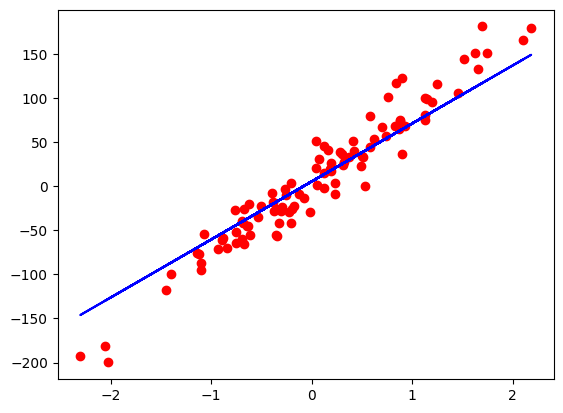

In [26]:
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()